In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Get dataset:-

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

# Inspection of dataset

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Checking Null values:-

In [15]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

-we can clearly see in train dataset there is some null values are present on Item_weight & Outlet_size

In [16]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

-Here also we can see there is some null values on Item_weight & Outlet_size

# Lets see how much % of null values arre present:-

In [19]:
test.isna().sum()/test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

for train:-

In [20]:
train.isna().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We can see there is 17% and 28% of missing values in Item weight and Outlet_Size columns which is almosrt same with eachother.

# Data Cleaning

<AxesSubplot:xlabel='Item_Weight'>

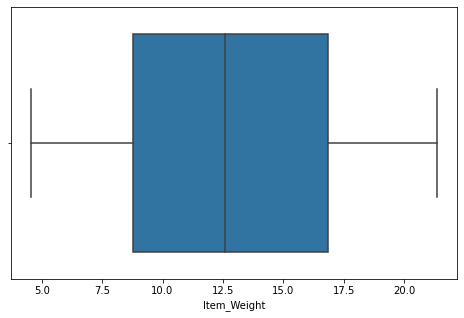

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight', data=train)

<AxesSubplot:xlabel='Item_Weight'>

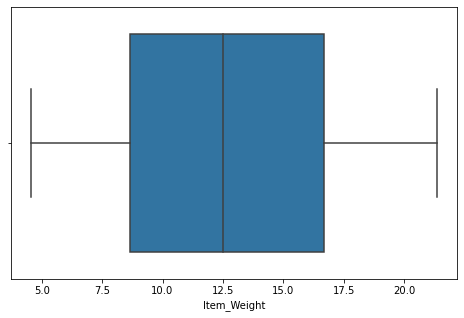

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight', data=test)

we can clearly see there is no outliers are present in it...so we have to put only mean values in the place of null values

In [24]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [25]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Since the outlet_size is a categorical column, we can impute the missing values by "Mode" instead of mean from the column

In [27]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

Again check for null value

In [28]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

here we can see null values are filled with some values.so there is no null values are there

# Exploratory Data Analysis:-

In [30]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [32]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

We can see there are some irregularities in the column like same name in diferent ways-like Low fat,lf,low fat...all are same but stored in various name

In [34]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat', 'Low Fat', 'Regular'], inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [36]:
#we have to change it as string value
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str)

In [37]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Now it coverts into single name..so thee is no irregularities in this column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

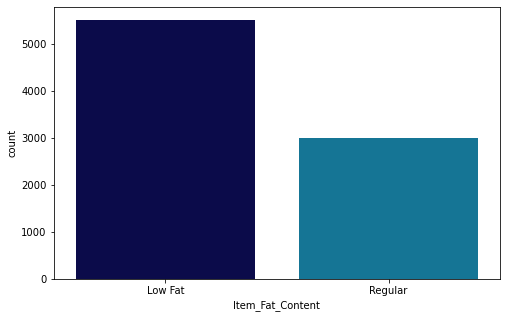

In [40]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=train, palette='ocean')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

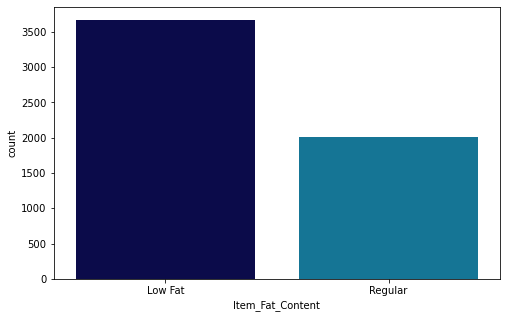

In [43]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=test, palette='ocean')

The Items bought are more which are of Low Fat.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

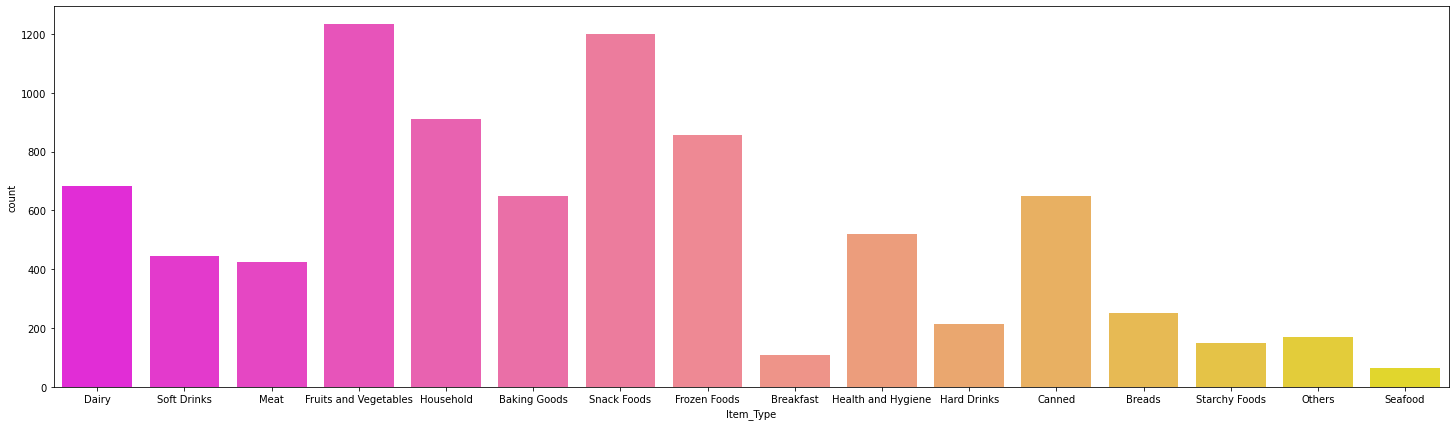

In [44]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=train, palette='spring')

-Fruits and Vegetables & snack foods are largely sold as people use them on daily purpose.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

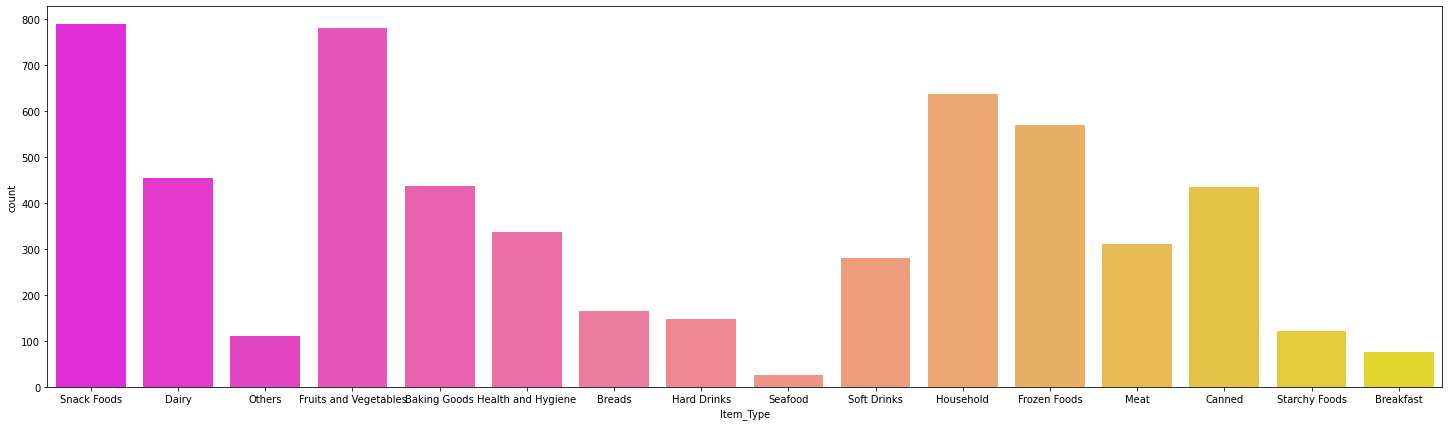

In [45]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=test, palette='spring')

-Here is also Fruits and Vegetables & snack foods are largely sold as people use them on daily purpose.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

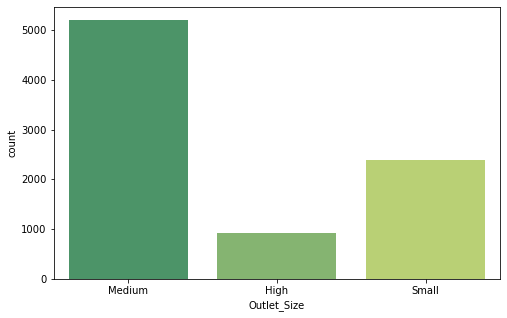

In [46]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=train, palette='summer')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

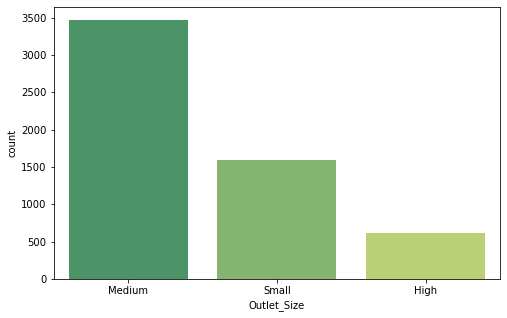

In [47]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=test, palette='summer')

-in both the cases the outlets are medium in size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

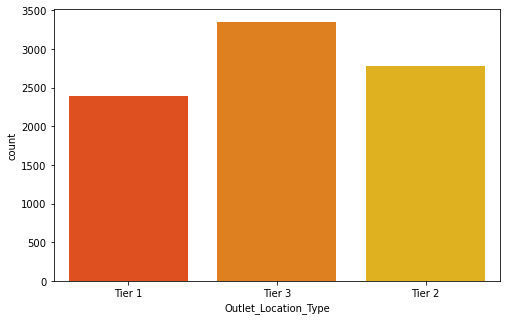

In [48]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=train, palette='autumn')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

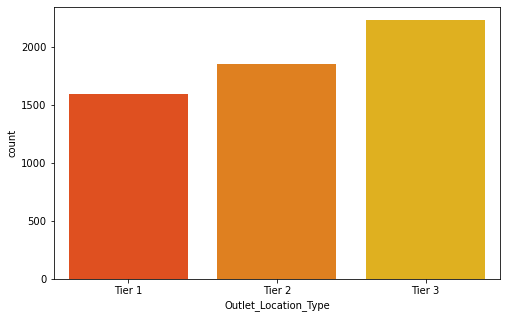

In [49]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=test, palette='autumn')

-In both the cases The Outlets are maximum in number in Tier 3 Cities.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

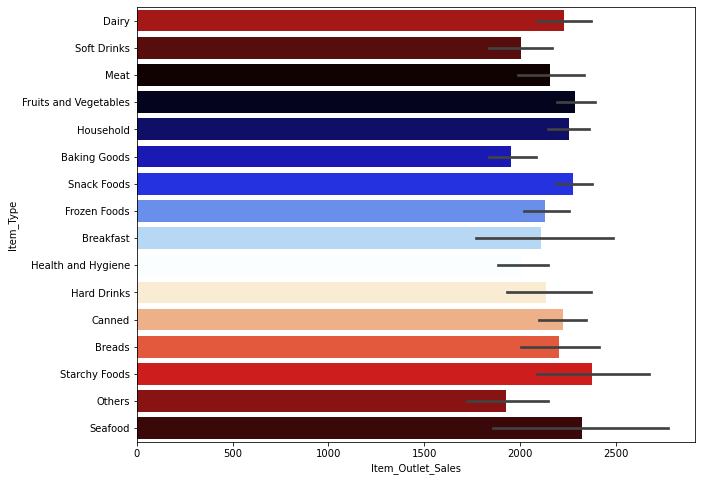

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train,palette= 'flag')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

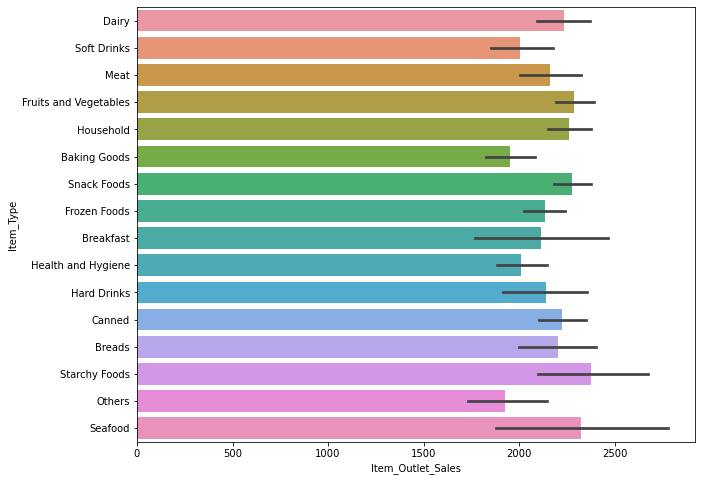

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train)

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<function matplotlib.pyplot.show(close=None, block=None)>

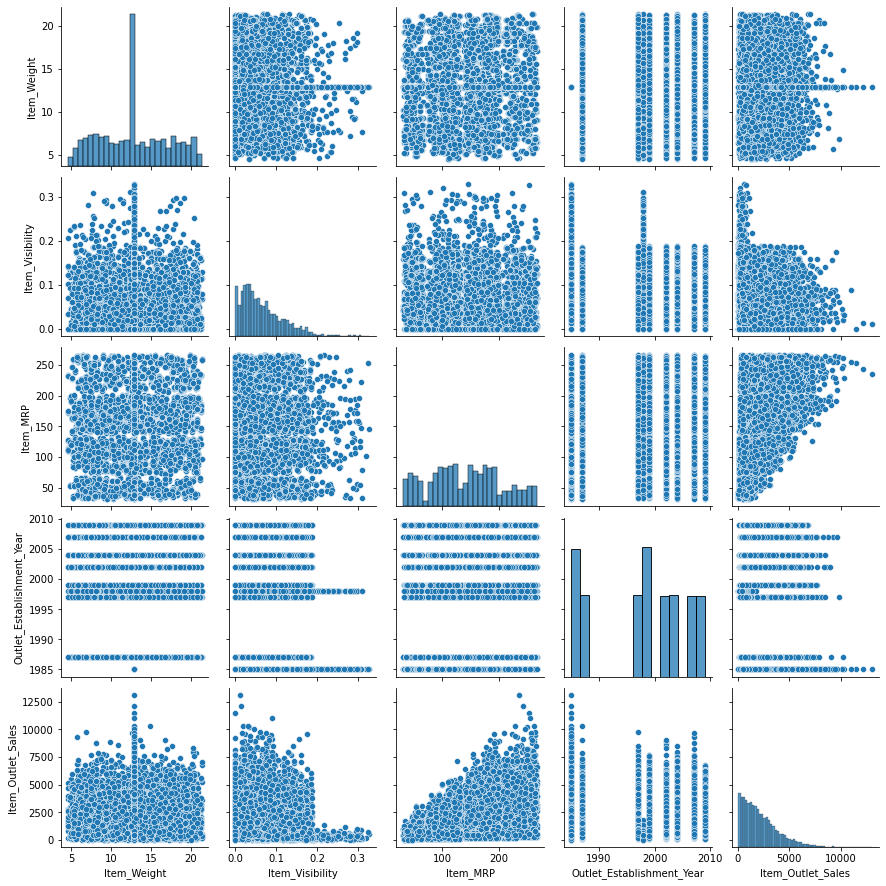

In [56]:
sns.pairplot(train)
plt.show

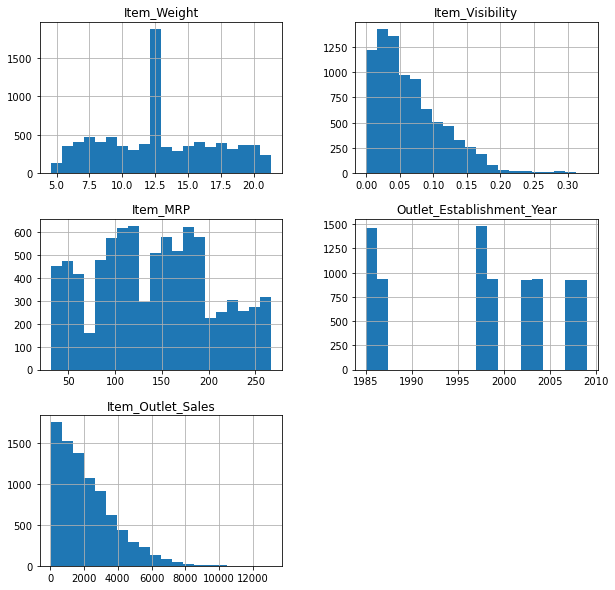

In [57]:
train.hist(bins=20,figsize=(10,10))
plt.show()

In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

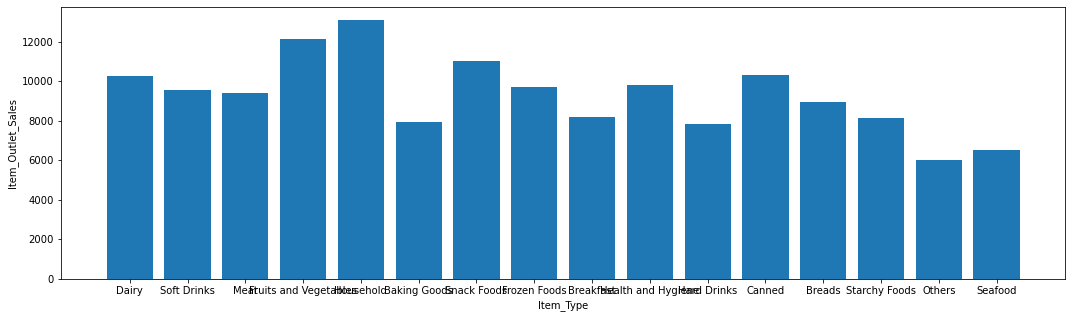

In [63]:
plt.figure(figsize=[18,5])
plt.bar(train['Item_Type'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

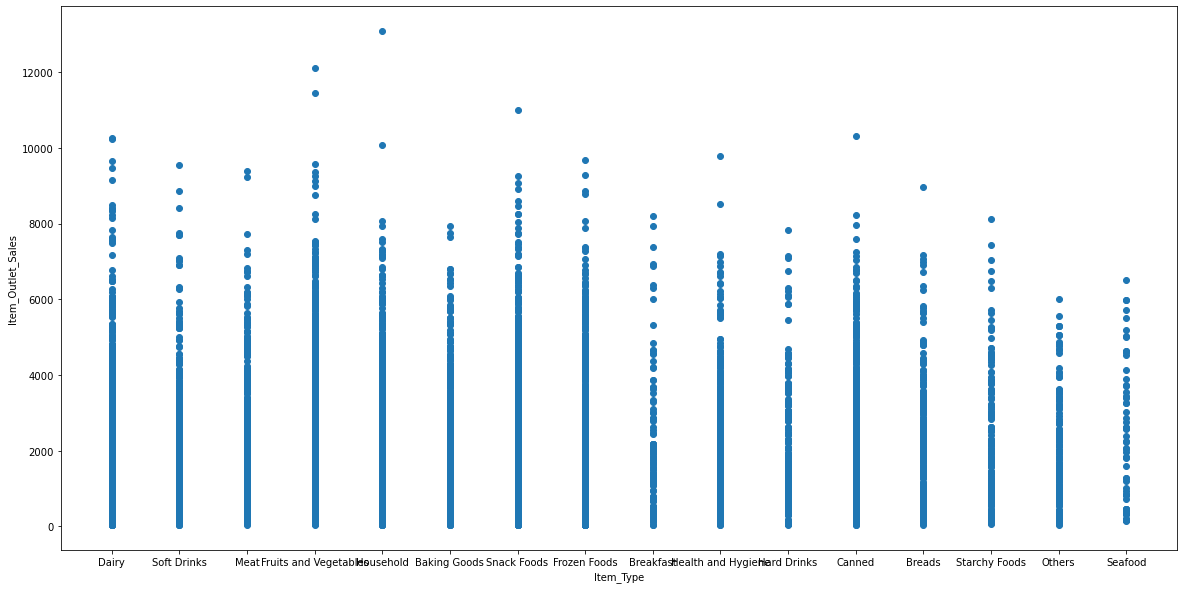

In [66]:
plt.figure(figsize=[20,10])
plt.scatter(train['Item_Type'],train['Item_Outlet_Sales'])
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

# Building a Model:-

In [71]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
le=LabelEncoder()
var_mode=train.select_dtypes(include ='object').columns

In [73]:
for i in var_mode:
    train[i]=le.fit_transform(train[i])
for i in var_mode:
    test[i]=le.fit_transform(test[i])

In [74]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [75]:
X=train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y=train['Item_Outlet_Sales']

In [76]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.2, random_state=22)

# import regression models:-

In [77]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [78]:
alg=[LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names=['Linear Regression','Ridge Regression','Lasso Regression','K Neighbors Regression','Decision Tree Regression']
rmse_list=[]

In [79]:
for name in alg:
    model=name
    model.fit(X_train, y_train)
    y_pred=model.predict(X_valid)
    MSE=metrics.mean_squared_error(y_valid, y_pred)
    rmse=np.sqrt(MSE)
    rmse_list.append(rmse)

In [80]:
evaluation=pd.DataFrame({'Model': names, 'RMSE': rmse_list})

In [81]:
evaluation

,Model,RMSE
0,Linear Regression,1246.171773
1,Ridge Regression,1246.061549
2,Lasso Regression,1245.732959
3,K Neighbors Regression,1596.678217
4,Decision Tree Regression,1569.728502


# conclusion:-

using this model we came to know that the products catagories such as- fruits and vegitables,diary,snack foods,starchy food and sea foods are having major role for increasing the sales of products